In [19]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
import pyke
from pyke import KeplerTargetPixelFile
from glob import glob
import everest
from ipywidgets import interact
from ipywidgets import interact, interactive, fixed, interact_manual
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
    hdu = fits.open('../data/ktwo212535880-c06_lpd-targ.fits')
    dat = hdu[1].data
    datacube = dat["FLUX"]
    time = dat["TIME"]
    LC = np.nansum(datacube, axis=(1,2))

In [4]:
LC

array([ 769.5491333 ,  816.61401367,  763.76190186, ...,  816.73962402,
        843.17907715,  889.38830566], dtype=float32)

In [5]:
datacube.shape

(3863, 8, 7)

In [6]:
n_steps = 12
std_vec = np.zeros(n_steps)
for i in range(n_steps):
    std_vec[i] = np.nanstd(datacube[i:-n_steps+i:n_steps,:,:] - datacube[i+n_steps*80,:,:])
Framemin = np.where(std_vec==np.nanmin(std_vec))[0][0]

In [8]:
subtracted = datacube-datacube[Framemin,:,:]   

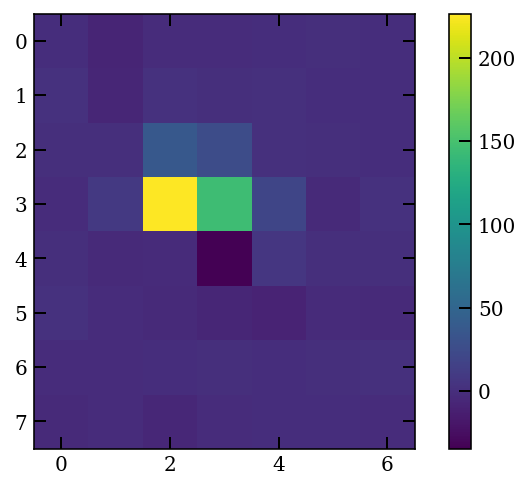

In [16]:
plt.imshow(subtracted[80*12,:,:])
plt.colorbar();

In [50]:
def plttpf(f):
    plt.imshow(subtracted[Framemin+f*12, :,:],vmin=0,vmax=60)
    plt.colorbar()
    plt.show()
    plt.imshow(subtracted[Framemin+f*12, :,:]/np.nanmedian(subtracted,axis = [0]))
    plt.colorbar()
    plt.show()

In [51]:
interact(plttpf, f=(0,len(subtracted[Framemin::12]),1));

interactive(children=(IntSlider(value=161, description='f', max=322), Output()), _dom_classes=('widget-interact',))

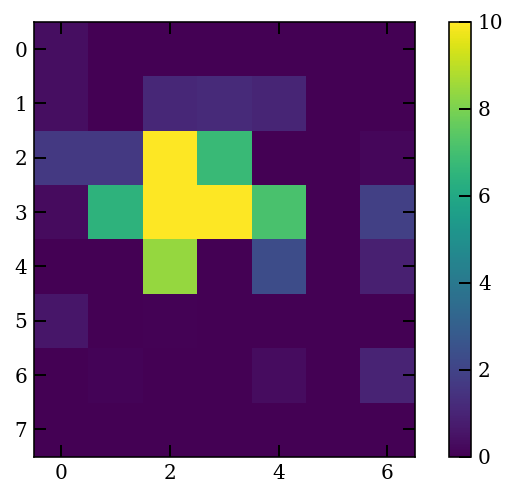

In [57]:
plt.imshow(np.nanmedian(subtracted,axis = [0]),vmin=0,vmax=10)
plt.colorbar()

In [382]:
testmask = np.nanmedian(subtracted,axis = [0])
testmask[testmask>6] = np.nan
testmask[testmask<6] = 1

/Users/ryanr/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in less
  app.launch_new_instance()


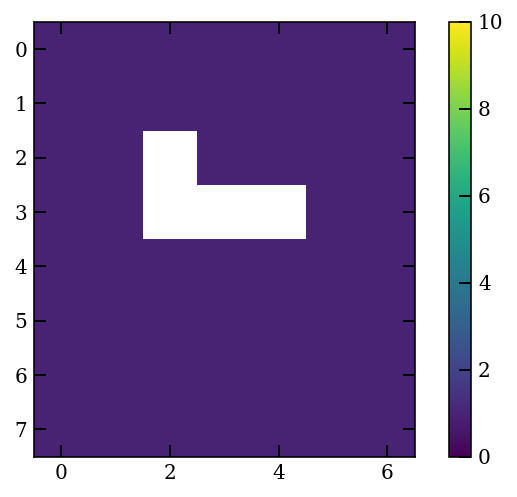

In [383]:
plt.imshow(testmask,vmin=0,vmax=10)
plt.colorbar()

In [384]:
np.nanstd(np.nanmedian(subtracted,axis = [0]))

10.834276

In [385]:
testlc = np.nansum(datacube*testmask, axis = (1,2))

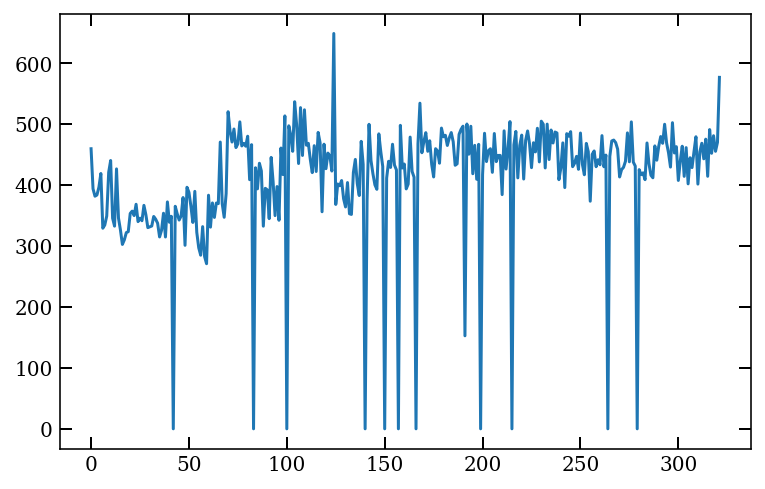

In [386]:
plt.plot(testlc[Framemin::12])

In [387]:
import itertools

In [388]:
x = np.arange(0,testmask.shape[0])
y = np.arange(0,testmask.shape[1])
X, Y = np.indices(testmask.shape)
Z = datacube[80,:,:]*testmask
mask = ~np.isnan(Z)
XX = X[mask]
YY = Y[mask]
ZZ = Z[mask]

In [389]:
from scipy import interpolate

In [390]:
f = interpolate.interp2d(YY, XX, ZZ, kind='cubic')

/Users/ryanr/anaconda3/lib/python3.5/site-packages/scipy/interpolate/_fitpack_impl.py:975: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=3,3 nx,ny=11,12 m=52 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


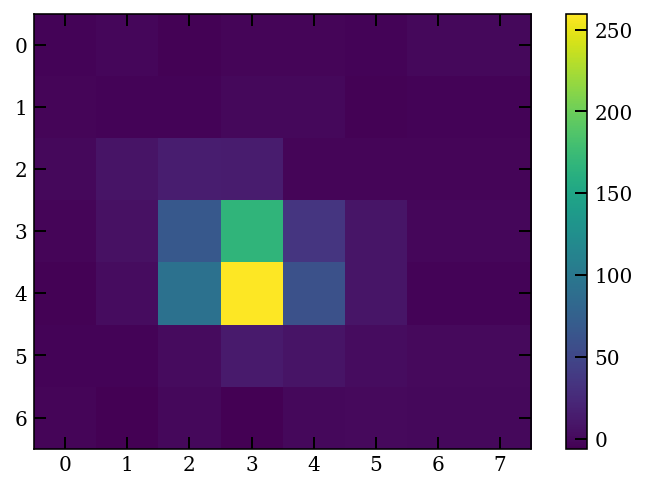

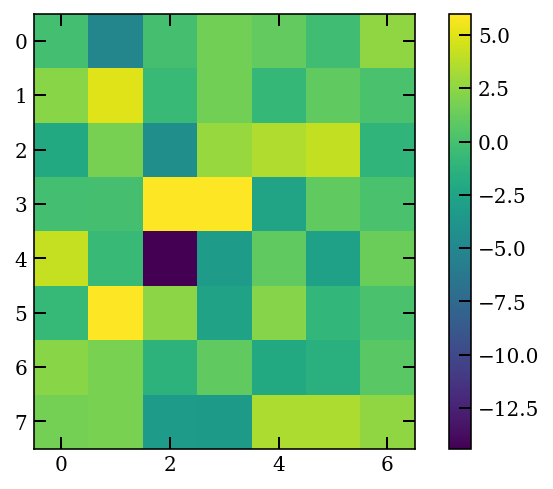

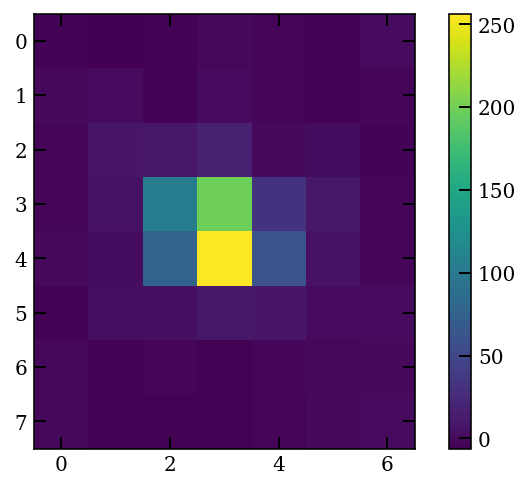

In [391]:
plt.imshow(f(x,y))
plt.colorbar()
plt.show()
plt.imshow(datacube[70,:,:]-f(y,x),vmax=6)
plt.colorbar()
plt.show()
plt.imshow(datacube[70,:,:])
plt.colorbar()
plt.show()

In [392]:
#Let's create some random  data
array = np.random.random_integers(0,10,(10,10)).astype(float)
#values grater then 7 goes to np.nan
array[array>7] = np.nan

x = np.arange(0, array.shape[1])
y = np.arange(0, array.shape[0])
#mask invalid values
array = np.ma.masked_invalid(array)
xx, yy = np.meshgrid(x, y)
#get only the valid values
x1 = xx[~array.mask]
y1 = yy[~array.mask]
newarr = array[~array.mask]

GD1 = interpolate.griddata((x1, y1), newarr.ravel(),
                          (xx, yy),
                             method='cubic')



/Users/ryanr/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: DeprecationWarning: This function is deprecated. Please call randint(0, 10 + 1) instead
  from ipykernel import kernelapp as app


In [395]:
Frame =70

testmask = np.nanmedian(subtracted,axis = [0])
testmask[testmask>6] = np.nan
testmask[testmask<6] = 1

x = np.arange(0,testmask.shape[1])
y = np.arange(0,testmask.shape[0])
testmask = np.ma.masked_invalid(testmask)

X, Y = np.meshgrid(x, y)
Z = datacube[Frame,:,:]*testmask
XX = X[~testmask.mask]
YY = Y[~testmask.mask]
ZZ = datacube[Frame,~testmask.mask]

Interp = interpolate.griddata((XX, YY), ZZ.ravel(),
                          (X, Y),
                             method='cubic')

/Users/ryanr/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in less


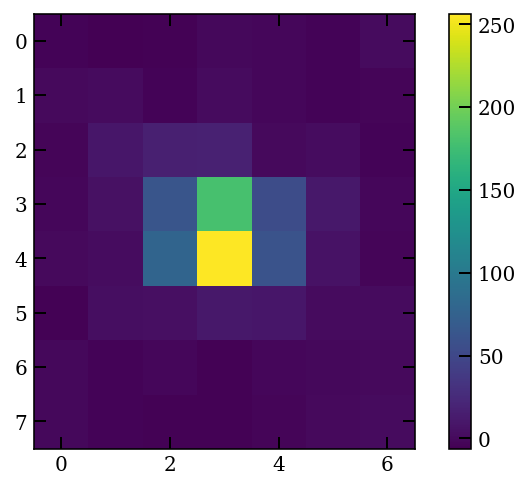

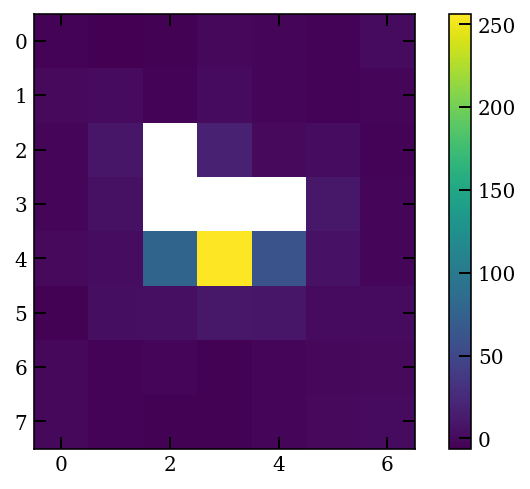

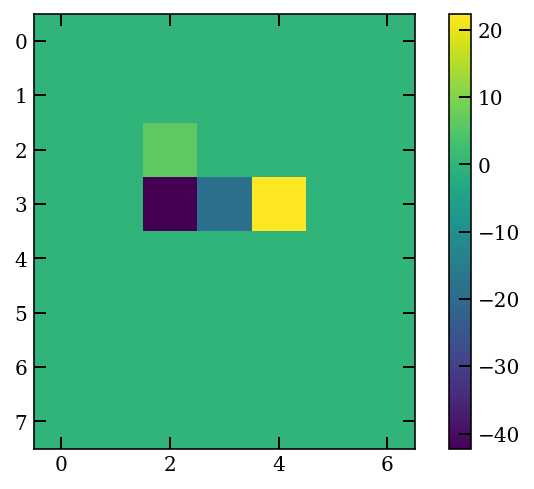

In [396]:
plt.imshow(Interp)#-datacube[Frame,:,:])
plt.colorbar()
plt.show()
plt.imshow(Z)
plt.colorbar()
plt.show()
plt.imshow(Interp-datacube[Frame,:,:])
plt.colorbar()
plt.show()

In [397]:
def pltdif(f):
    plt.plot(star.time[::12], manual_lc[::12], '.', label='Sum ev. pixels', ms=4)
    plt.plot(star.time, manual_lc, '.', label='Sum ev. pixels', ms=1, alpha=0.3)
    plt.ylim(600, 1400)
    plt.xlim(2385, 2440)
    plt.axvline(star.time[0+f*12])
    plt.show()
    plt.imshow(diffed[f, :,:],vmin=0,vmax=70)
    plt.colorbar
    plt.minorticks_on()
    plt.show()

In [398]:
interact(pltdif, f=(0,321,1));

interactive(children=(IntSlider(value=160, description='f', max=321), Output()), _dom_classes=('widget-interact',))

In [248]:
def BkgSubLC(Data):
    n_steps = 12
    std_vec = np.zeros(n_steps)
    for i in range(n_steps):
        std_vec[i] = np.nanstd(Data[i:-n_steps+i:n_steps,:,:] - Data[i+n_steps*80,:,:])
    Framemin = np.where(std_vec==np.nanmin(std_vec))[0][0]
    subtracted = Data-Data[Framemin,:,:]   
    
    testmask = np.nanmedian(subtracted, axis = [0])
    testmask[testmask>2] = np.nan
    testmask[testmask<2] = 1
    
    

    x = np.arange(0,testmask.shape[1])
    y = np.arange(0,testmask.shape[0])
    testmask = np.ma.masked_invalid(testmask)

    X, Y = np.meshgrid(x, y)
    XX = X[~testmask.mask]
    YY = Y[~testmask.mask]
    
    LC = np.zeros(subtracted.shape[0])
    LCfull = np.zeros(Data.shape[0])
    for i in range(subtracted.shape[0]):
        ZZ = subtracted[i,~testmask.mask]

        Interp = interpolate.griddata((XX, YY), ZZ.ravel(), (X, Y), method='cubic')
        
        LC[i] = np.nansum(subtracted[i,testmask.mask] - Interp[testmask.mask], axis=(0,1))
        
        LCfull[i] = np.nansum(subtracted[i,:,:], axis=(0,1))
        
    return LC

In [251]:
BkgSubLC(datacube)

/Users/ryanr/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in less


AxisError: axis 1 is out of bounds for array of dimension 1

In [435]:
Data = datacube

n_steps = 12
std_vec = np.zeros(n_steps)
for i in range(n_steps):
    std_vec[i] = np.nanstd(Data[i:-n_steps+i:n_steps,:,:] - Data[i+n_steps*80,:,:])
Framemin = np.where(std_vec==np.nanmin(std_vec))[0][0]
subtracted = Data-Data[Framemin,:,:]   

testmask = np.nanmedian(subtracted, axis = [0])
testmask[testmask>2] = np.nan
testmask[testmask<2] = 1



x = np.arange(0,testmask.shape[1])
y = np.arange(0,testmask.shape[0])
testmask = np.ma.masked_invalid(testmask)

X, Y = np.meshgrid(x, y)
XX = X[~testmask.mask]
YY = Y[~testmask.mask]

LC = np.zeros(subtracted.shape[0])
LCmask = np.zeros(subtracted.shape[0])
LCfull = np.zeros(Data.shape[0])
LCbkgI = np.zeros(Data.shape[0])
LCbkg = np.zeros(Data.shape[0])
for i in range(subtracted.shape[0]):
    ZZ = subtracted[i,~testmask.mask]

    Interp = interpolate.griddata((XX, YY), ZZ.ravel(), (X, Y), method='linear')

    LC[i] = np.nansum(subtracted[i,testmask.mask] - Interp[testmask.mask])
    LCmask[i] = np.nansum(subtracted[i,testmask.mask])
    LCfull[i] = np.nansum(subtracted[i,:,:])
    LCbkgI[i] = np.nansum(subtracted[i,~testmask.mask] - Interp[~testmask.mask])
    LCbkg[i] = np.nansum(subtracted[i,~testmask.mask])

/Users/ryanr/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in less


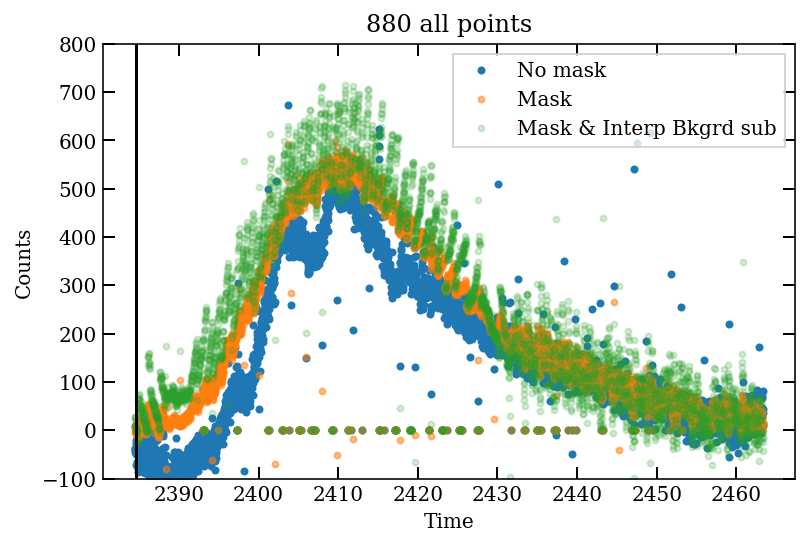

In [436]:
plt.figure()#figsize=(10,8))
plt.plot(time,LCfull,'.', label = 'No mask')
plt.plot(time,LCmask,'.', alpha = 0.5, label = 'Mask')
plt.plot(time,LC,'.', alpha = 0.2, label='Mask & Interp Bkgrd sub')
plt.axvline(time[Framemin],color='k')

#plt.ylim(800,1500)
plt.ylim(-100,800)
plt.ylabel('Counts')
plt.xlabel('Time')
plt.legend() 
plt.title('880 all points')
plt.savefig('880all.pdf');


In [350]:
time[320]

2391.0016453421049

In [335]:
12*320

3840

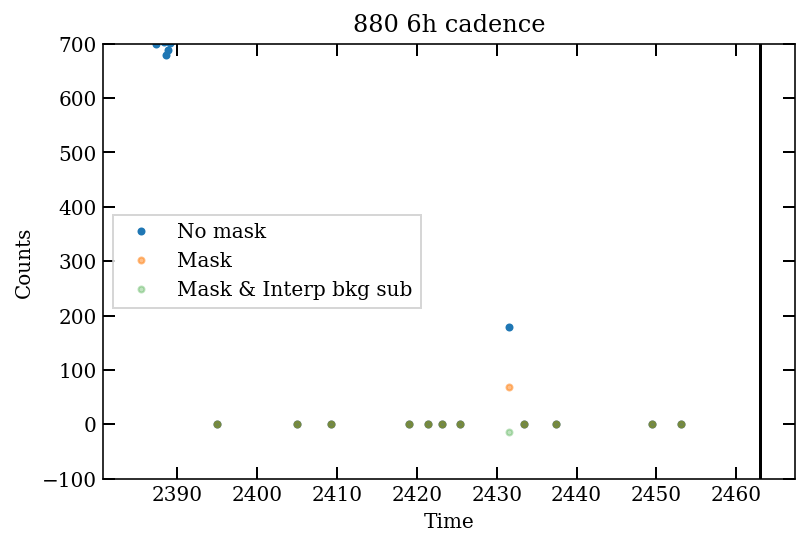

In [433]:
plt.figure()#figsize=(10,8))
plt.plot(time[Framemin::12],LCfull[Framemin::12],'.', label = 'No mask')
plt.plot(time[Framemin::12],LCmask[Framemin::12],'.', alpha = 0.5, label = 'Mask')
plt.plot(time[Framemin::12],LC[Framemin::12],'.', alpha = 0.3, label='Mask & Interp bkg sub')
plt.axvline(time[3840],color='k')
#plt.ylim(800,1500)
plt.ylim(-100,700)
plt.ylabel('Counts')
plt.xlabel('Time')
plt.legend() 
plt.title('880 6h cadence')
plt.savefig('880sixhour.pdf');


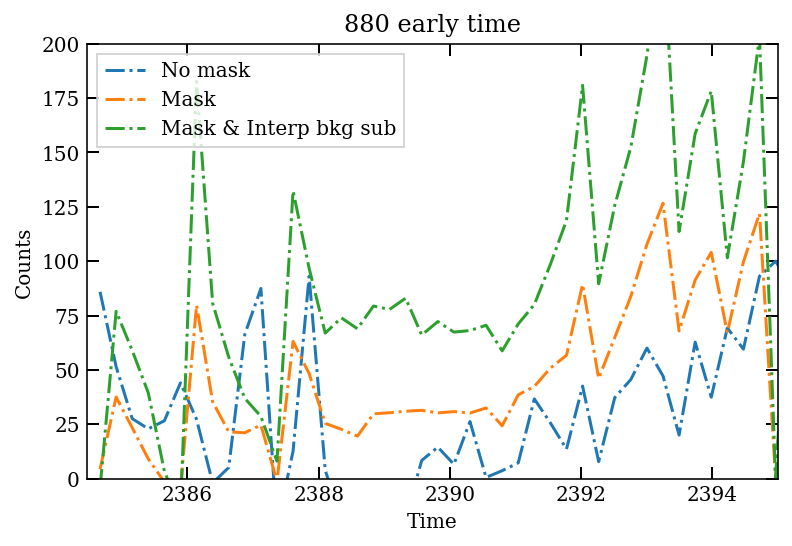

In [364]:
plt.figure()#figsize=(10,8))
plt.plot(time[Framemin::12],LCfull[Framemin::12]+100,'-.', label = 'No mask')
plt.plot(time[Framemin::12],LCmask[Framemin::12],'-.', label = 'Mask')
plt.plot(time[Framemin::12],LC[Framemin::12],'-.', label='Mask & Interp bkg sub')

#plt.ylim(800,1000)
plt.ylim(0,200)
plt.xlim(time[0],2395)
plt.ylabel('Counts')
plt.xlabel('Time')
plt.legend() 
plt.title('880 early time')
plt.savefig('880shock.pdf');


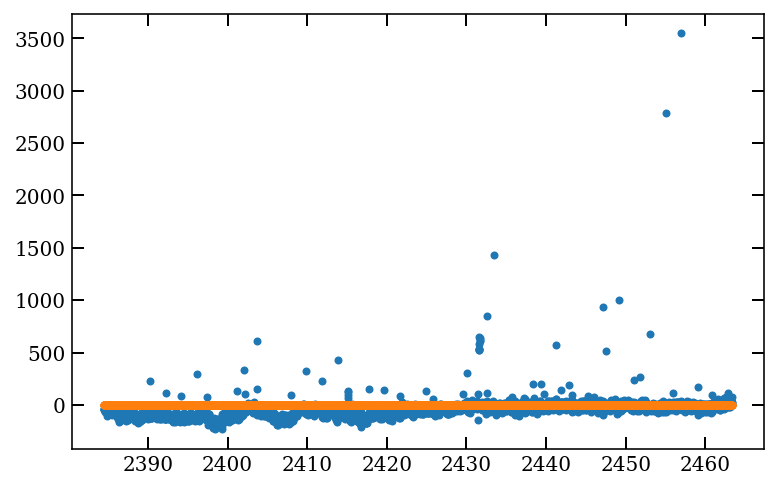

In [287]:
plt.plot(time,LCbkg,'.')
plt.plot(time,LCbkgI,'.')


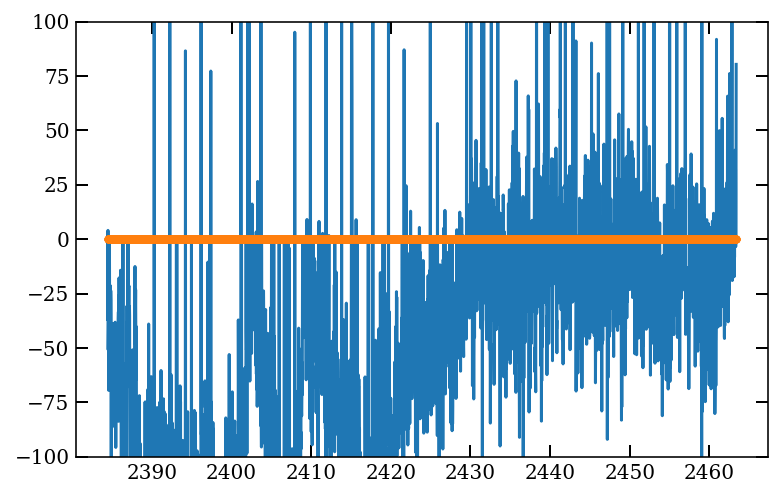

In [290]:
plt.plot()

In [265]:
test = subtracted[:,testmask.mask]

In [273]:
testmask.mask

array([[False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False,  True,  True, False, False, False],
       [False,  True,  True,  True,  True, False, False],
       [False, False,  True, False,  True, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False]], dtype=bool)

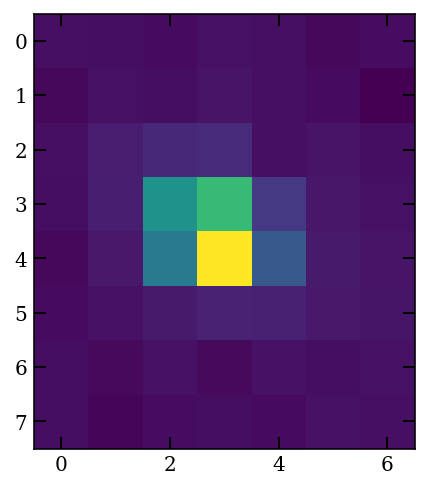

In [375]:
plt.imshow(datacube[3843,:,:])

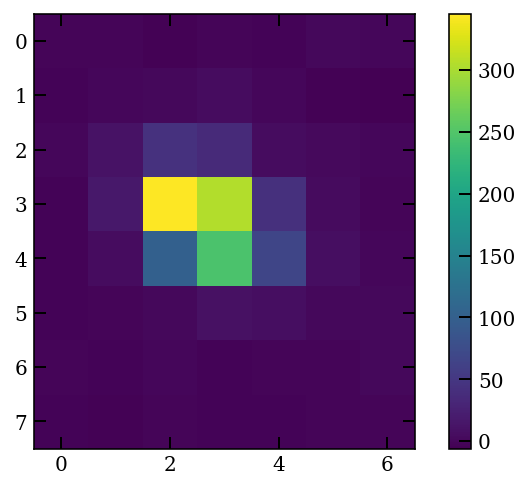

In [459]:
plt.imshow(datacube[Framemin+12*80,:,:])
plt.colorbar()

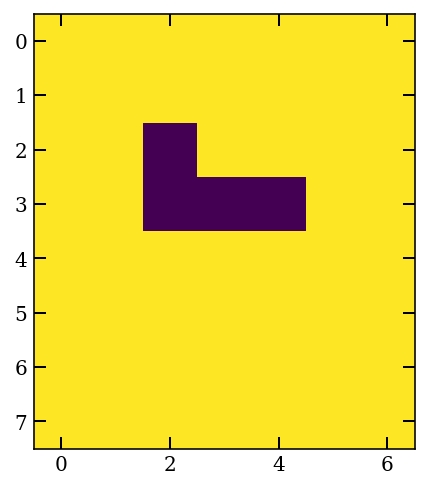

In [401]:
plt.imshow(mask)

# Mask for galaxy  

In [408]:
Galmask = np.zeros(testmask.shape)
Galmask[4,4] = 1
Galmask[4,3] = 1
Galmask[4,2] = 1

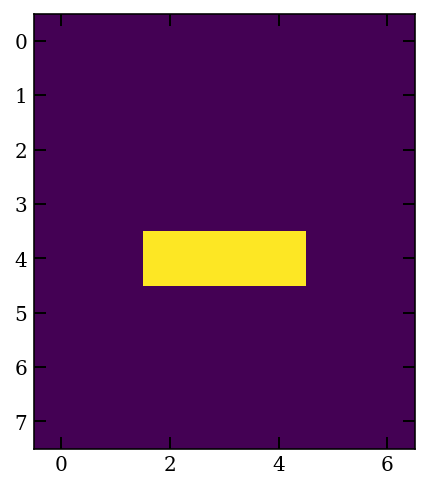

In [409]:
plt.imshow(Galmask)

In [464]:
Galcurve = np.nansum(datacube*Galmask-datacube[Framemin]*Galmask, axis=(1,2))

(-50, 400)

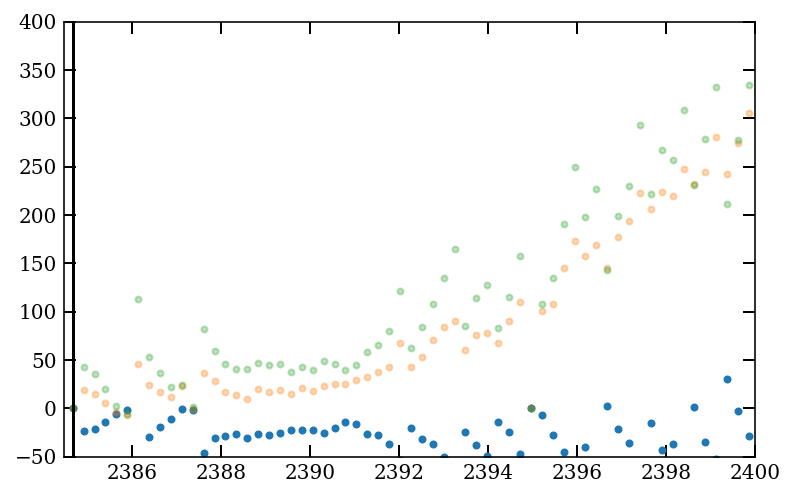

In [472]:
plt.plot(time[Framemin::12],Galcurve[Framemin::12],'.')
plt.plot(time[Framemin::12],LCmask[Framemin::12],'.', alpha= 0.3)
plt.plot(time[Framemin::12],LCmask[Framemin::12]-Galcurve[Framemin::12],'.', alpha= 0.3)
plt.axvline(time[Framemin],color='k')
plt.xlim(time[0],2400)
plt.ylim(-50,400)

(2384.4633377487626, 2400)

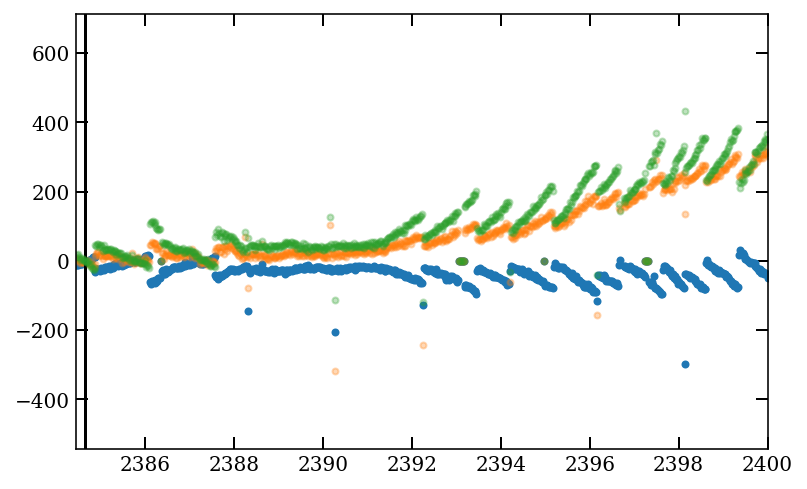

In [473]:
plt.plot(time,Galcurve,'.')
plt.plot(time,LCmask,'.', alpha= 0.3)
plt.axvline(time[Framemin],color='k')
plt.plot(time,LCmask-Galcurve,'.', alpha= 0.3)
plt.xlim(time[0],2400)
#plt.ylim(0,1000)

In [474]:
test = []

In [475]:
len(test)

0